In [3]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

In [4]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Brasil Grand Prix', 'SQ')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (1.33 GB) /Users/PietroPaolo/Library/Caches/fastf1
events      WARNING 	Correcting user input 'Brasil Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Sprint Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data fo

In [5]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:19:45.769000,NOR,4,0 days 00:01:10.672000,2.0,1.0,NaT,NaT,0 days 00:00:18.312000,0 days 00:00:35.964000,...,True,McLaren,0 days 00:18:35.097000,2024-11-01 18:33:35.106,1,NaN,False,,False,True
4,0 days 00:27:52.843000,NOR,4,0 days 00:01:09.477000,5.0,2.0,NaT,NaT,0 days 00:00:18.031000,0 days 00:00:35.283000,...,False,McLaren,0 days 00:26:43.366000,2024-11-01 18:41:43.375,1,NaN,False,,False,True
7,0 days 00:37:15.956000,NOR,4,0 days 00:01:09.063000,8.0,3.0,NaT,NaT,0 days 00:00:17.994000,0 days 00:00:34.991000,...,True,McLaren,0 days 00:36:06.893000,2024-11-01 18:51:06.902,1,NaN,False,,False,True
10,0 days 00:53:48.433000,NOR,4,0 days 00:01:08.928000,11.0,4.0,NaT,NaT,0 days 00:00:17.793000,0 days 00:00:35.006000,...,True,McLaren,0 days 00:52:39.505000,2024-11-01 19:07:39.514,1,NaN,False,,False,True
15,0 days 00:19:10.800000,RUS,63,0 days 00:01:10.870000,2.0,1.0,NaT,NaT,0 days 00:00:18.355000,0 days 00:00:36.111000,...,True,Mercedes,0 days 00:17:59.930000,2024-11-01 18:32:59.939,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0 days 00:27:39.175000,OCO,31,0 days 00:01:11.052000,5.0,2.0,NaT,NaT,0 days 00:00:18.411000,0 days 00:00:36.167000,...,False,Alpine,0 days 00:26:28.123000,2024-11-01 18:41:28.132,1,NaN,False,,False,True
207,0 days 00:18:47.828000,PER,11,0 days 00:01:11.162000,2.0,1.0,NaT,NaT,0 days 00:00:18.336000,0 days 00:00:36.413000,...,True,Red Bull Racing,0 days 00:17:36.666000,2024-11-01 18:32:36.675,1,NaN,False,,False,True
210,0 days 00:26:16.893000,PER,11,0 days 00:01:10.392000,5.0,2.0,NaT,NaT,0 days 00:00:18.302000,0 days 00:00:35.671000,...,False,Red Bull Racing,0 days 00:25:06.501000,2024-11-01 18:40:06.510,1,NaN,False,,False,True
213,0 days 00:39:28.083000,PER,11,0 days 00:01:10.024000,8.0,3.0,NaT,NaT,0 days 00:00:18.062000,0 days 00:00:35.610000,...,True,Red Bull Racing,0 days 00:38:18.059000,2024-11-01 18:53:18.068,1,NaN,False,,False,True


In [7]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [8]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [9]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.


In [10]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

In [11]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

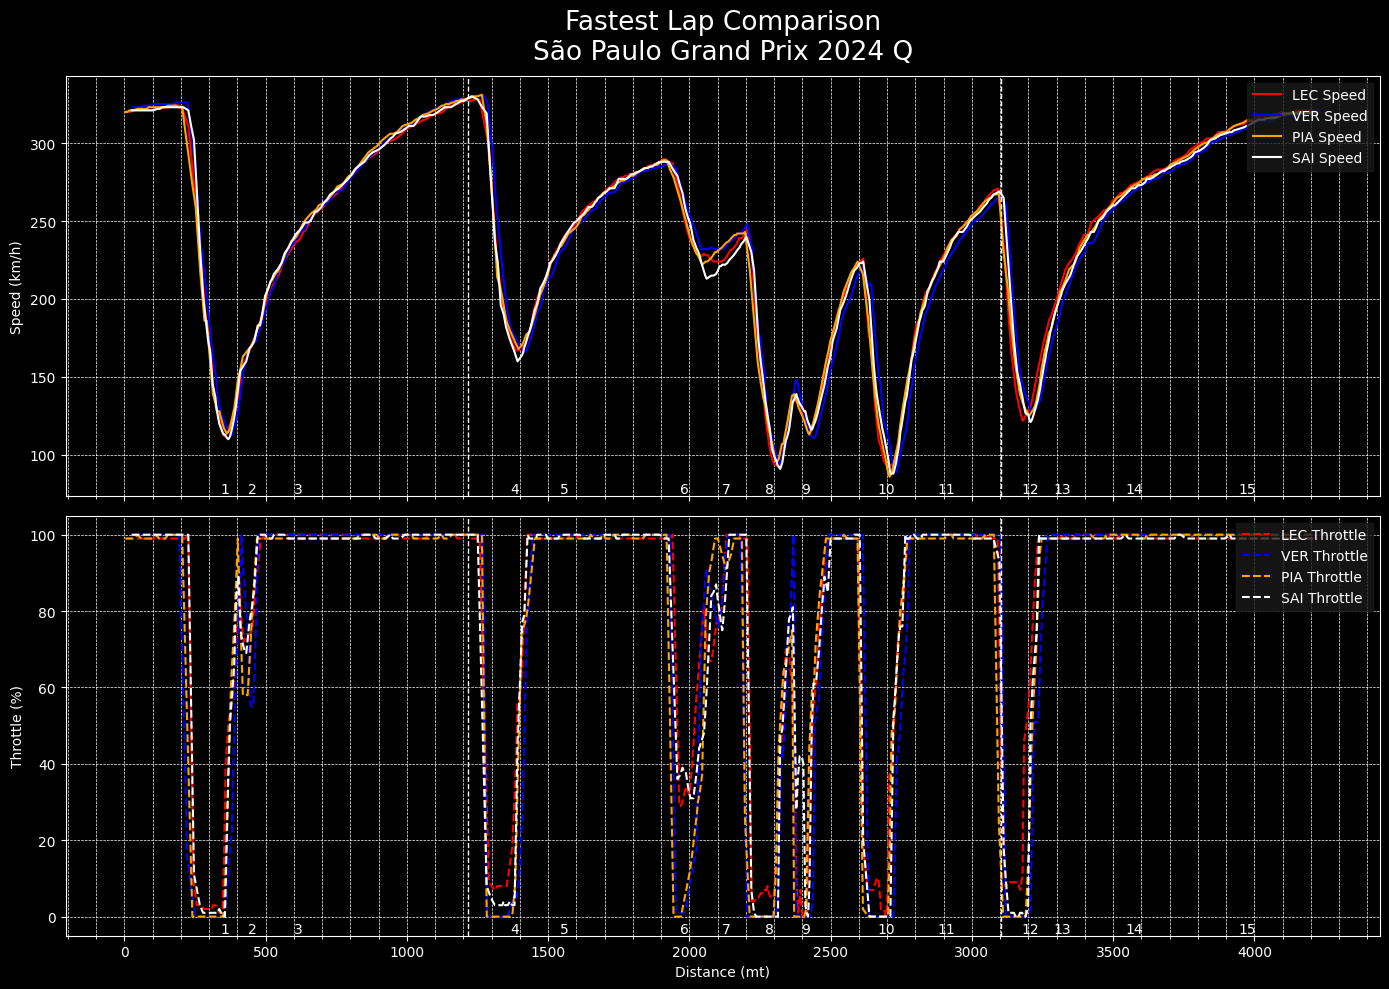

In [18]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_drivers('LEC').pick_fastest()
PIA_FASTEST_LAP = transformed_laps.pick_drivers('PIA').pick_fastest()
VER_FASTEST_LAP = transformed_laps.pick_drivers('VER').pick_fastest()
SAI_FASTEST_LAP = transformed_laps.pick_drivers('SAI').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
PIA_tel = PIA_FASTEST_LAP.get_car_data().add_distance()
VER_tel = VER_FASTEST_LAP.get_car_data().add_distance()
SAI_tel = SAI_FASTEST_LAP.get_car_data().add_distance()

#interpolating
LEC_tel = interpolate_dataframe(LEC_tel)
VER_tel = interpolate_dataframe(VER_tel)
PIA_tel = interpolate_dataframe(PIA_tel)
SAI_tel = interpolate_dataframe(SAI_tel)
# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(VER_tel['Distance'], VER_tel['Speed'], color='blue', label='VER Speed')
ax1.plot(PIA_tel['Distance'], PIA_tel['Speed'], color='orange', label='PIA Speed')
ax1.plot(SAI_tel['Distance'], SAI_tel['Speed'], color='white', label='SAI Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Q", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(VER_tel['Distance'], VER_tel['Throttle'], color='blue', linestyle='--', label='VER Throttle')
ax2.plot(PIA_tel['Distance'], PIA_tel['Throttle'], color='orange', linestyle='--', label='PIA Throttle')
ax2.plot(SAI_tel['Distance'], SAI_tel['Throttle'], color='white', linestyle='--', label='SAI Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


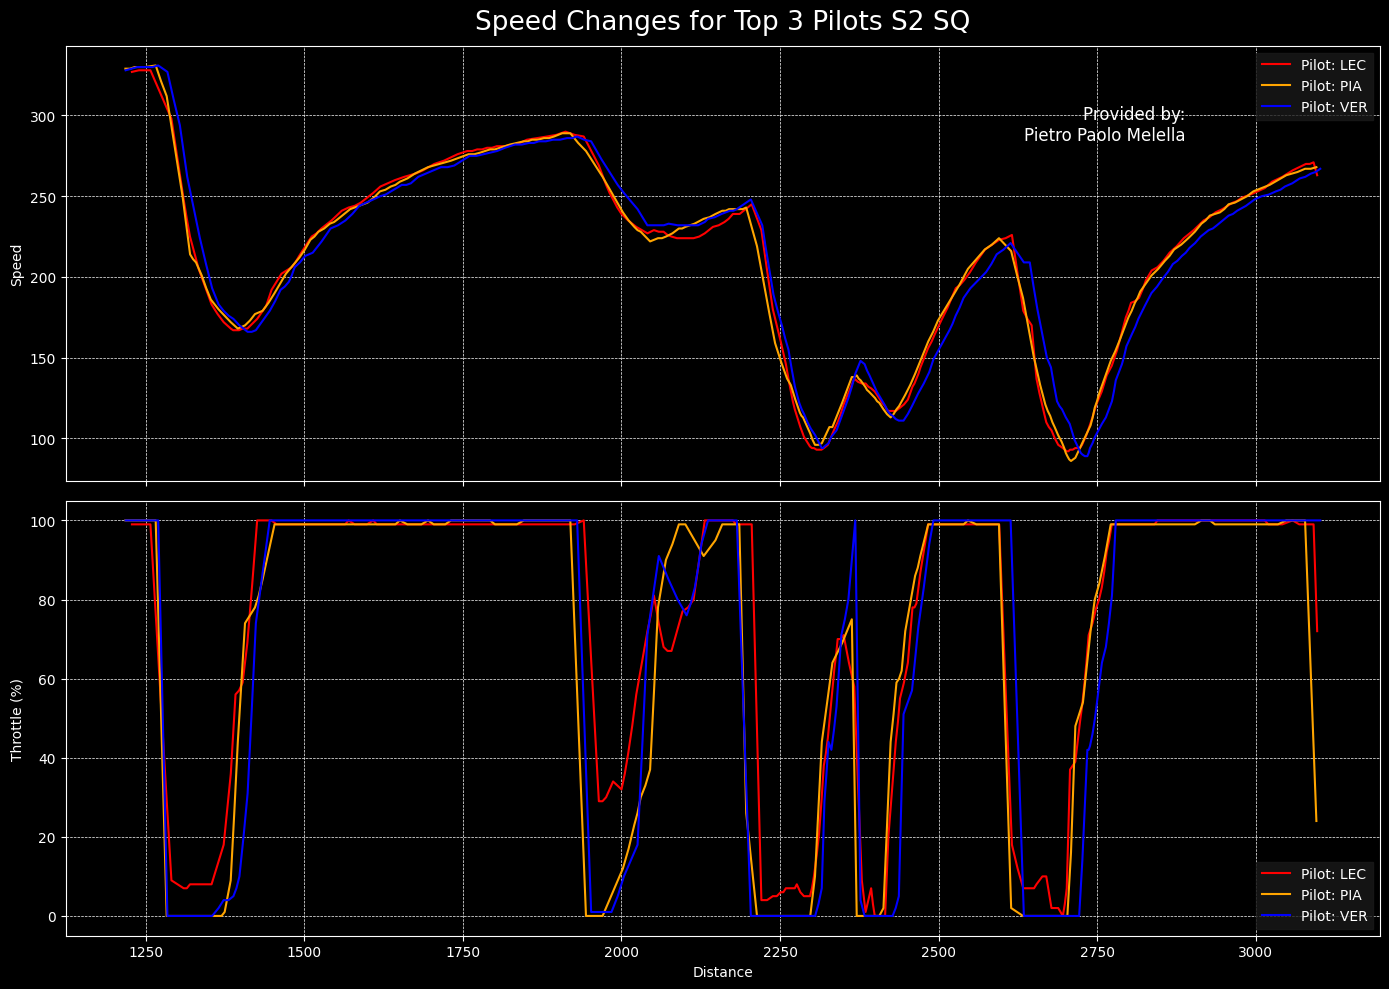

In [13]:
# Initialize a figure for the plots with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.patch.set_facecolor('lightgray')  # Set the background color for the figure
fig.patch.set_facecolor('black')  # Set the background color for the figure to white

drivers_4 = ['LEC', 'PIA', 'VER']

# Loop through each driver and plot their speed and throttle changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    # Getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    # Interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    # Selecting the data starting from a particular turn
    pilot_car_data_13_14 = pilot_car_data[
        (pilot_car_data['Distance'] > sector1_end_distance) & 
        (pilot_car_data['Distance'] < sector2_end_distance)]
    
    # Plot the speed vs. distance for the current pilot on ax1
    ax1.plot(pilot_car_data_13_14['Distance'], pilot_car_data_13_14['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

    # Plot the throttle vs. distance for the current pilot on ax2
    ax2.plot(pilot_car_data_13_14['Distance'], pilot_car_data_13_14['Throttle'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Customize ax1 (Speed plot)
ax1.set_ylabel('Speed')
ax1.set_title('Speed Changes for Top 3 Pilots S2 SQ')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend()

# Customize ax2 (Throttle plot)
ax2.set_xlabel('Distance')
ax2.set_ylabel('Throttle (%)')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend()

# Add a signature in the lower-right corner of the second plot
fig.text(
    0.85, 0.85, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    color='white', fontsize=12
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

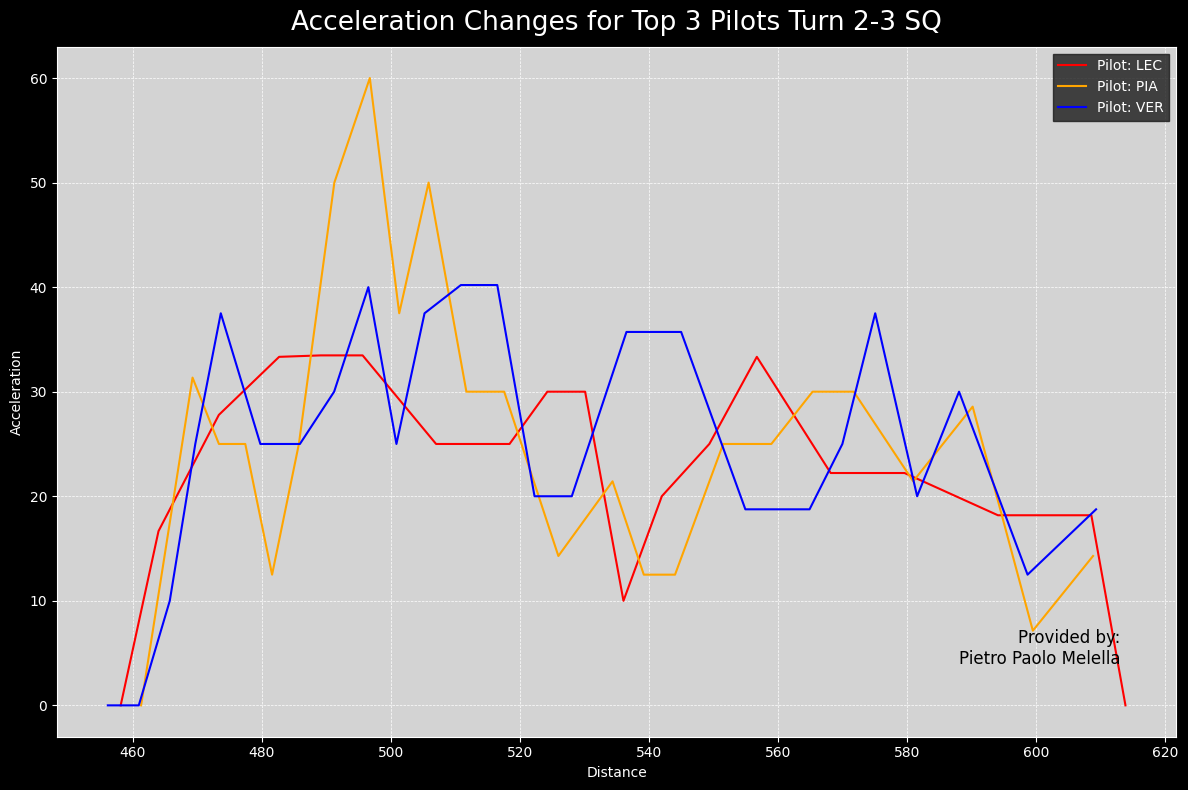

In [16]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[1])) & 
        (pilot_car_data['Distance'] < corner_distances[2])
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 3 Pilots Turn 2-3 SQ')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()